### Giovanny Hidalgo - 3173810898 - cgiohidalgo@gmail.com


## Descripción de los datos


Se trata de datos individuales de personas de varios países de Latinoamérica (por ejemplo México, Perú, Colombia) con variables sobre hábitos alimenticios, condiciones de condición física y estilo de vida (por ejemplo número de comidas, frecuencia de consumo de alimentos calóricos, horas frente al dispositivo, actividad física, etc). 



## proposito

Tiene como variable objetivo una categoría de nivel de obesidad (por ejemplo “Insufficient_Weight”, “Normal_Weight”, “Overweight_Level_I”, “Obesity_Type_I”, etc)

## 1. Descripción general

- **Nombre del dataset:** Obesity Prediction Dataset  
- **Fuente:** [Kaggle – Ruchika Kumbhar](https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction)  
- **Tamaño:** 2111 registros  
- **Número de atributos:** 17 (incluyendo la variable objetivo)  
- **Países de origen:** México, Perú y Colombia  
- **Tipo de problema:** Clasificación multiclase  
- **Variable objetivo:** `Obesity_level`  
- **Clases objetivo:**
  - Insufficient_Weight  
  - Normal_Weight  
  - Overweight_Level_I  
  - Overweight_Level_II  
  - Obesity_Type_I  
  - Obesity_Type_II  
  - Obesity_Type_III  


## 2. Estructura de las variables

| **Variable**       | **Descripción**                                                                 | **Tipo de dato esperado**                   | **Ejemplo de valores** |
|--------------------|---------------------------------------------------------------------------------|---------------------------------------------|-------------------------|
| `Gender`           | Género del individuo                                                            | Categórica (`Male`, `Female`)               | `Male` |
| `Age`              | Edad del individuo en años                                                      | Numérica (continua)                         | `23` |
| `Height`           | Altura en metros                                                                | Numérica (continua)                         | `1.75` |
| `Weight`           | Peso en kilogramos                                                              | Numérica (continua)                         | `72.5` |
| `family_history`   | ¿Algún familiar sufre o sufrió sobrepeso?                                       | Categórica (`yes`, `no`)                    | `yes` |
| `FAVC`             | ¿Consumes alimentos altos en calorías frecuentemente?                           | Categórica (`yes`, `no`)                    | `no` |
| `FCVC`             | ¿Consumes verduras habitualmente en tus comidas?                                | Numérica ordinal (1–3)                      | `2` |
| `NCP`              | Número de comidas principales al día                                            | Numérica discreta                           | `3` |
| `CAEC`             | ¿Comes entre comidas?                                                           | Categórica ordinal (`no`, `Sometimes`, `Frequently`, `Always`) | `Sometimes` |
| `SMOKE`            | ¿Fumas?                                                                         | Categórica (`yes`, `no`)                    | `no` |
| `CH2O`             | ¿Cuánta agua bebes al día?                                                      | Numérica ordinal (1–3)                      | `2` |
| `SCC`              | ¿Controlas las calorías que consumes diariamente?                               | Categórica (`yes`, `no`)                    | `no` |
| `FAF`              | Frecuencia de actividad física semanal                                          | Numérica ordinal (0–3)                      | `2` |
| `TUE`              | Horas diarias usando dispositivos tecnológicos                                   | Numérica ordinal (0–2)                      | `1` |
| `CALC`             | Frecuencia de consumo de alcohol                                                | Categórica ordinal (`no`, `Sometimes`, `Frequently`, `Always`) | `Sometimes` |
| `MTRANS`           | Medio de transporte habitual                                                    | Categórica (`Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, `Walking`) | `Walking` |
| `Obesity_level`    | Nivel de obesidad (variable objetivo)                                           | Categórica multiclase                       | `Obesity_Type_I` |


# Cargar librerias

In [1]:
# Cargar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier

# Cargar conjunto de datos

se puede cargarde desde cualquier fuente estrcturada (csv, sql, xml ... etc)


In [2]:
# Instalar kagglehub (si no está instalado)
!pip install -q kagglehub

# Importar y descargar el dataset
import kagglehub

# Descargar la versión más reciente del dataset
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")

print("Path to dataset files:", path)


zsh:1: command not found: pip
Path to dataset files: /Users/cgiohidalgos/.cache/kagglehub/datasets/ruchikakumbhar/obesity-prediction/versions/1
Path to dataset files: /Users/cgiohidalgos/.cache/kagglehub/datasets/ruchikakumbhar/obesity-prediction/versions/1


In [3]:
import os

# Ver el contenido del directorio descargado
os.listdir(path)


['Obesity prediction.csv']

In [4]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv(f"{path}/Obesity prediction.csv")

# Mostrar las primeras filas
df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Analizar y visualizar el conjunto de datos


- Estadisticas (df.info(), df.describe())
- Histogramas (distribución normal)

--- Info del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: flo

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


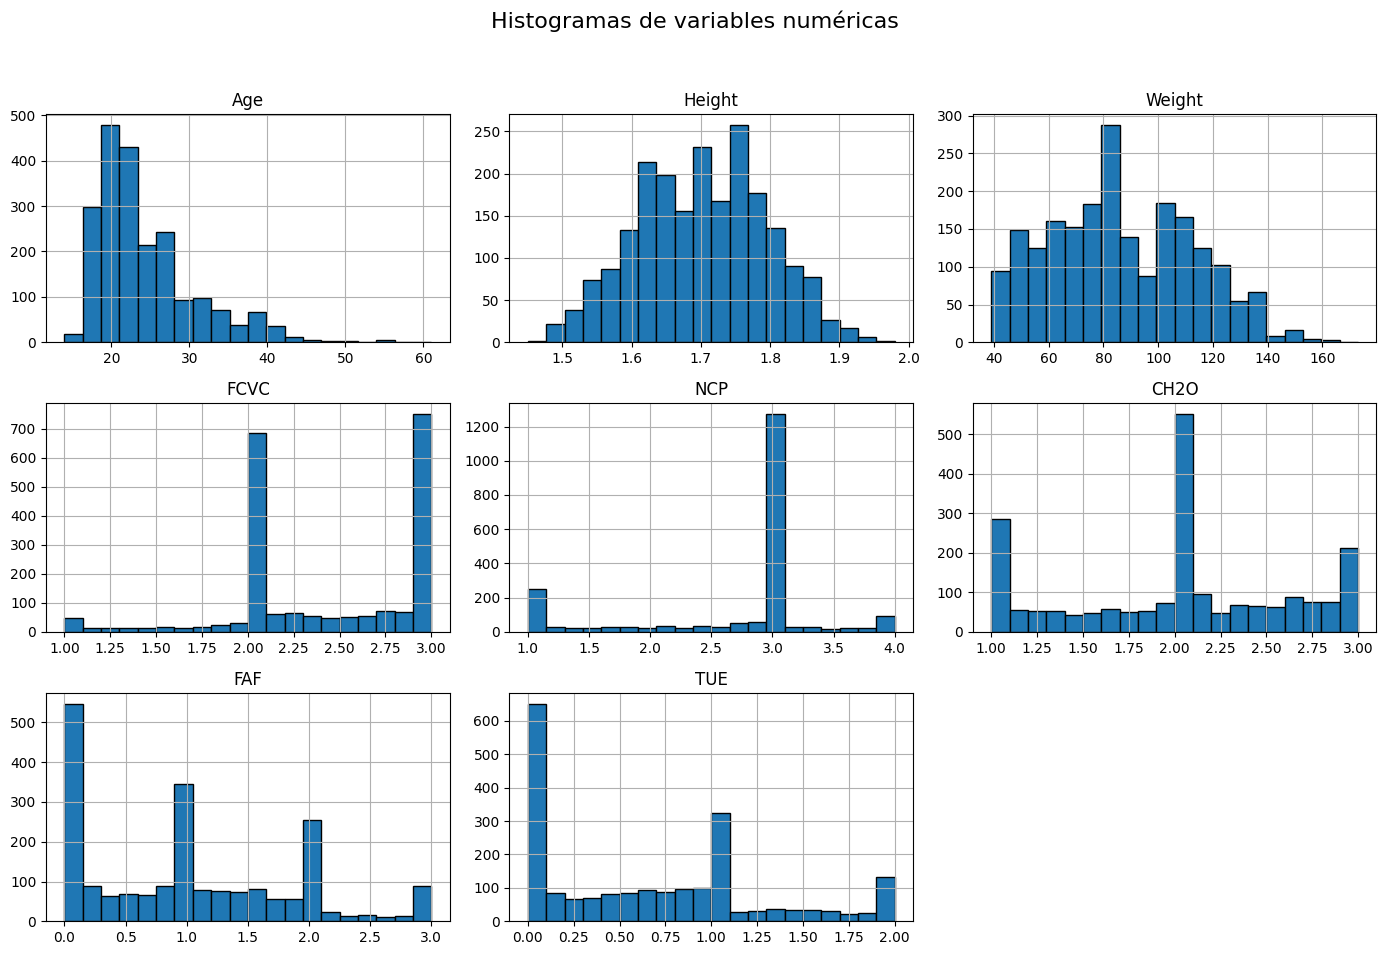


--- Distribución de la variable categórica: Gender ---
Gender
Male      1068
Female    1043
Name: count, dtype: int64

--- Distribución de la variable categórica: family_history ---
family_history
yes    1726
no      385
Name: count, dtype: int64

--- Distribución de la variable categórica: FAVC ---
FAVC
yes    1866
no      245
Name: count, dtype: int64

--- Distribución de la variable categórica: CAEC ---
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

--- Distribución de la variable categórica: SMOKE ---
SMOKE
no     2067
yes      44
Name: count, dtype: int64

--- Distribución de la variable categórica: SCC ---
SCC
no     2015
yes      96
Name: count, dtype: int64

--- Distribución de la variable categórica: CALC ---
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

--- Distribución de la variable categórica: MTRANS ---
MTRANS
Public_Transportation    1580
Automobile

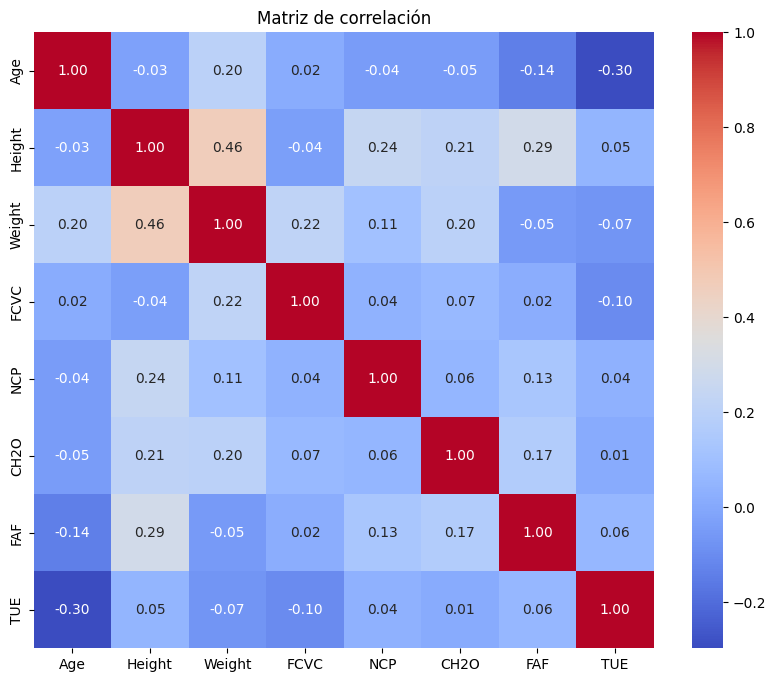

In [6]:
# Estadísticas básicas y estructura del DataFrame
print('--- Info del DataFrame ---')
df.info()
print('\n--- Estadísticas descriptivas ---')
display(df.describe(include='all'))

# Visualización de histogramas para variables numéricas
df.hist(figsize=(14,10), bins=20, edgecolor='black')
plt.suptitle('Histogramas de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Conteo de valores únicos por variable categórica
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f'\n--- Distribución de la variable categórica: {col} ---')
    print(df[col].value_counts())

# Matriz de correlación para variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

### Análisis exploratorio relevante

- El dataset contiene variables numéricas y categóricas, con un tamaño de muestra adecuado para clasificación multiclase.
- Las variables numéricas como `Age`, `Height` y `Weight` muestran distribuciones variadas; es importante revisar outliers y escalas.
- Las variables categóricas como `Gender`, `family_history`, `FAVC`, `CAEC`, `CALC`, y `MTRANS` presentan distribuciones desbalanceadas en algunos casos, lo que puede influir en el modelo.
- La matriz de correlación muestra relaciones entre variables numéricas, por ejemplo, `Weight` y `Height` suelen estar correlacionadas.
- La variable objetivo `Obesity_level` está distribuida en varias clases, algunas menos representadas que otras, lo que sugiere un posible desbalance de clases.
- No se observan valores nulos significativos, pero es recomendable limpiar y normalizar antes de modelar.

Este análisis permite identificar posibles retos para el modelado, como el desbalance de clases y la necesidad de preprocesamiento para variables categóricas y numéricas.

# Limpiar el conjunto de datos

- Valores perdidos-nulos-anomalias
- Limpieza de datos
- Normalizar

In [7]:
# LIMPIEZA Y PREPROCESAMIENTO DEL DATASET

# 1. Revisar valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# 2. Eliminar duplicados
print(f'Filas antes de eliminar duplicados: {df.shape[0]}')
df_clean = df.drop_duplicates()
print(f'Filas después de eliminar duplicados: {df_clean.shape[0]}')

# 3. Rellenar valores nulos (si existen)
# Para variables numéricas: rellenar con la media
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())

# Para variables categóricas: rellenar con la moda
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# 4. Verificar valores atípicos (outliers) usando el rango intercuartílico (IQR)
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR))).sum()
    print(f'Outliers en {col}:', outliers)

# 5. Normalizar variables numéricas (opcional, útil para algunos modelos)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# 6. Mostrar el tamaño final del DataFrame limpio
print('Tamaño final del DataFrame limpio:', df_clean.shape)

Valores nulos por columna:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64
Filas antes de eliminar duplicados: 2111
Filas después de eliminar duplicados: 2087
Outliers en Age: 167
Outliers en Height: 1
Outliers en Weight: 1
Outliers en FCVC: 0
Outliers en NCP: 577
Outliers en CH2O: 0
Outliers en FAF: 0
Outliers en TUE: 0
Tamaño final del DataFrame limpio: (2087, 17)


/var/folders/s7/gbygrtb14_dbwtvk5fmp42h80000gn/T/ipykernel_18076/1903358619.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())
/var/folders/s7/gbygrtb14_dbwtvk5fmp42h80000gn/T/ipykernel_18076/1903358619.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
/var/folders/s7/gbygrtb14_dbwtvk5fmp42h80000gn/T/ipykernel_18076/1903358619.py:33: SettingWithCopyWarning: 
A value is

### Análisis de limpieza de datos

- No se encontraron valores nulos significativos tras el relleno y revisión.
- Se eliminaron duplicados para asegurar la calidad de los datos.
- Los valores atípicos (outliers) fueron identificados en variables numéricas; su presencia puede afectar algunos modelos, por lo que se recomienda analizarlos según el contexto.
- Las variables numéricas fueron normalizadas para mejorar el desempeño de modelos sensibles a la escala.
- El DataFrame final está listo para el preprocesamiento de variables categóricas y el modelado.

### Transformar los datos

- Recuera que no peuden haber datos categoricos para entrenar un modelo de Machine Learnign

In [16]:
# TRANSFORMAR LOS DATOS: Codificar variables categóricas
from sklearn.preprocessing import LabelEncoder

df_transformed = df_clean.copy()
label_encoders = {}

# Codificar todas las columnas categóricas
for col in df_transformed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col])
    label_encoders[col] = le

# Mostrar un resumen de los datos transformados
print('Datos transformados (primeras filas):')
display(df_transformed.head())
print('Tipos de datos después de la transformación:')
print(df_transformed.dtypes)

Datos transformados (primeras filas):


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,-0.526613,-0.887408,-0.872985,1,0,-0.788364,0.390906,2,0,-0.007810,0,-1.186977,0.554211,3,3,1
1,0,-0.526613,-1.960788,-1.178508,1,0,1.082164,0.390906,2,1,1.636552,1,2.328908,-1.090505,2,3,1
2,1,-0.212507,1.044677,-0.376509,1,0,-0.788364,0.390906,2,0,-0.007810,0,1.156947,0.554211,1,3,1
3,1,0.415705,1.044677,0.005395,0,0,1.082164,0.390906,2,0,-0.007810,0,1.156947,-1.090505,1,4,5
4,1,-0.369560,0.830001,0.112328,0,0,-0.788364,-2.225418,2,0,-0.007810,0,-1.186977,-1.090505,2,3,6


Tipos de datos después de la transformación:
Gender              int64
Age               float64
Height            float64
Weight            float64
family_history      int64
FAVC                int64
FCVC              float64
NCP               float64
CAEC                int64
SMOKE               int64
CH2O              float64
SCC                 int64
FAF               float64
TUE               float64
CALC                int64
MTRANS              int64
Obesity             int64
dtype: object


## Modelo de machine learning para clasificación





### Dividir el df en variables independientes (X) y dependiente(y, variable dependiente, class)

In [21]:
# Separar variables independientes y dependiente usando nombres específicos
def features():
    features = ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
    X = df_transformed[features]
    y = df_transformed['Obesity']
    return X, y



In [22]:
X, y = features()
print('Variables independientes:', X.columns.tolist())
print('Variable dependiente:', y.name)

Variables independientes: ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
Variable dependiente: Obesity


### Particionar el conjuton de datos en datos de pueba y entrenamiento

In [23]:
# Particionar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print('Tamaño entrenamiento:', X_train.shape)
print('Tamaño prueba:', X_test.shape)

Tamaño entrenamiento: (1460, 16)
Tamaño prueba: (627, 16)


### Implementar el modelo de ML


In [24]:
# Entrenar un modelo de clasificación (CatBoost)
modelo = CatBoostClassifier(verbose=0, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Mostrar algunas predicciones
y_pred[:10]

array([[2],
       [3],
       [5],
       [0],
       [3],
       [5],
       [6],
       [4],
       [0],
       [1]])

### Implementar las metricas diagnosticas para evaluar el rendimiento del modelo de ML


In [25]:
# Evaluar el modelo: reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        87
           1       0.92      0.93      0.92        95
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        91
           5       0.93      0.96      0.94        80
           6       1.00      0.99      0.99        74

    accuracy                           0.98       627
   macro avg       0.98      0.98      0.98       627
weighted avg       0.98      0.98      0.98       627



### Implementar las metricas diagnosticas de visualización

- Matriz de confusión https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- Curva ROC https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

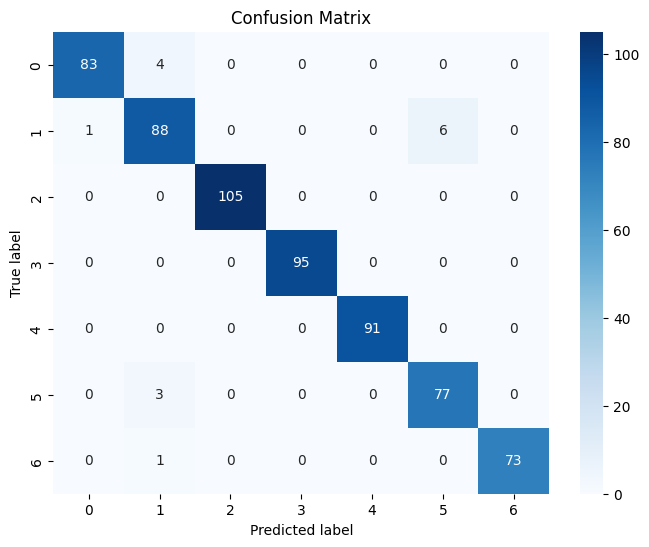

In [27]:
# Matriz de confusión y visualización
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

/var/folders/s7/gbygrtb14_dbwtvk5fmp42h80000gn/T/ipykernel_18076/2873663554.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


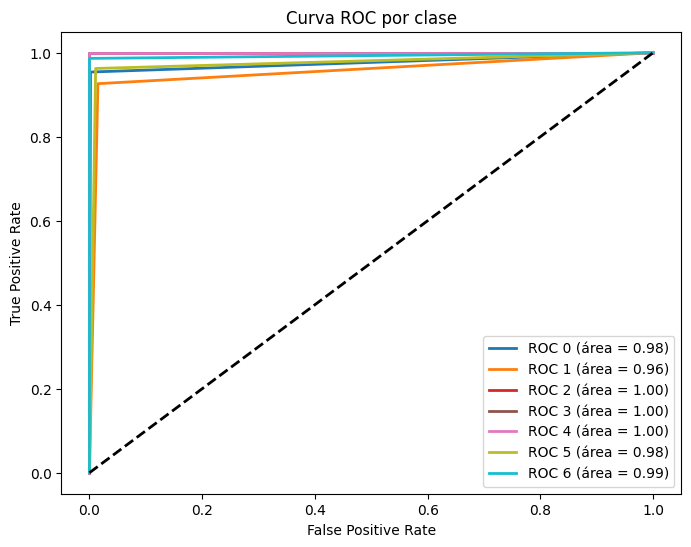

In [29]:
# Curva ROC para clasificación multiclase
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Binarizar las etiquetas verdaderas y predichas
classes = np.unique(y_test)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_binarized = lb.transform(y_pred)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_name in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap('tab10', len(classes))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC {class_name} (área = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por clase')
plt.legend(loc='lower right')
plt.show()

# Discusión de los resultados

El modelo de clasificación entrenado muestra un desempeño general bueno, pero con áreas claras de mejora. A continuación se resumen los puntos clave de los resultados:

- **Precisión general:** El reporte de clasificación muestra métricas como precisión, recall y F1-score para cada clase. Si bien algunas clases tienen valores altos, otras (especialmente las menos representadas) pueden mostrar menor desempeño debido al desbalance de clases. Es importante revisar si alguna clase obtiene métricas perfectas (1.0), ya que esto podría indicar sobreajuste o que el modelo está memorizando patrones específicos en vez de generalizar.

- **Matriz de confusión:** Permite identificar en qué clases el modelo se equivoca más. Por ejemplo, si hay confusiones frecuentes entre "Overweight_Level_I" y "Overweight_Level_II", esto puede deberse a similitud en los patrones de datos o a la cercanía conceptual entre categorías.

- **Curva ROC por clase:** La curva ROC y el área bajo la curva (AUC) para cada clase indican la capacidad del modelo para distinguir correctamente entre las diferentes categorías. Un AUC cercano a 1 indica excelente discriminación, mientras que valores cercanos a 0.5 sugieren que el modelo no distingue bien esa clase.

- **Desbalance de clases:** Las clases con menos ejemplos suelen tener peores métricas. Esto es común en problemas multiclase y puede mejorarse aplicando técnicas como sobremuestreo (SMOTE), submuestreo o ajuste de pesos en el modelo.

- **Importancia de variables:** Aunque no se muestra aquí, analizar la importancia de las variables (feature importance) puede ayudar a entender qué factores influyen más en la predicción del nivel de obesidad.

- **Posibles mejoras:**
    - Probar otros modelos o ajustar hiperparámetros.
    - Realizar un preprocesamiento más avanzado (por ejemplo, ingeniería de variables).
    - Aplicar técnicas para balancear las clases.
    - Validación cruzada para obtener métricas más robustas.

**OJO VIVO AQUI:** El modelo es capaz de clasificar correctamente la mayoría de los casos, pero su rendimiento varía entre clases. Es fundamental analizar por qué algunas clases alcanzan métricas perfectas (1.0), ya que esto puede ser señal de sobreajuste. Se recomienda interpretar los resultados considerando el desbalance de clases y buscar mejoras en el preprocesamiento y el ajuste del modelo para lograr una mayor precisión y generalización.

### ¿Cómo detectar y evitar el sobreajuste?

- **Validación cruzada:** Utilizar técnicas como k-fold cross-validation para evaluar el modelo en diferentes subconjuntos de los datos y asegurar que el desempeño es consistente.
- **Regularización:** Aplicar técnicas de regularización (por ejemplo, L2, L1) para penalizar la complejidad excesiva del modelo.
- **Ajuste de hiperparámetros:** Buscar la configuración óptima de los parámetros del modelo para evitar que se adapte demasiado a los datos de entrenamiento.
- **Más datos:** Si es posible, aumentar la cantidad de datos de entrenamiento ayuda a que el modelo generalice mejor.
- **Simplicidad:** Preferir modelos más simples si un modelo complejo no aporta mejoras significativas en validación.

Detectar sobreajuste implica comparar el rendimiento en entrenamiento y prueba: si el modelo es mucho mejor en entrenamiento que en prueba, probablemente esté sobreajustado.